In [2]:
# ======================
# SMART IRRIGATION SYSTEM
# Data Analysis & Modeling
# ======================

# --- Core Libraries ---
import pandas as pd
import numpy as np
import joblib

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# --- Machine Learning ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    accuracy_score
)

# --- Configuration ---
RANDOM_STATE = 42
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
# -------------------------------
# STEP 1: LOAD AND PREPROCESS DATA
# -------------------------------

# Load the dataset with error handling
try:
    df = pd.read_csv("irrigation_machine.csv")
    print("Data loaded successfully. Shape:", df.shape)
    
    # Drop unnamed column if exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
        print("Dropped unnamed column")
        
    # Show basic info
    print("\nData types:")
    print(df.dtypes)
    
    # Separate features and targets
    X = df.iloc[:, :20]  # First 20 columns are sensors
    y = df.iloc[:, 20:]   # Last 3 columns are parcels
    
    print("\nBasic statistics:")
    print(X.describe().loc[['min', 'mean', 'max']].round(2))
    
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")



Data loaded successfully. Shape: (2000, 24)
Dropped unnamed column

Data types:
sensor_0     float64
sensor_1     float64
sensor_2     float64
sensor_3     float64
sensor_4     float64
sensor_5     float64
sensor_6     float64
sensor_7     float64
sensor_8     float64
sensor_9     float64
sensor_10    float64
sensor_11    float64
sensor_12    float64
sensor_13    float64
sensor_14    float64
sensor_15    float64
sensor_16    float64
sensor_17    float64
sensor_18    float64
sensor_19    float64
parcel_0       int64
parcel_1       int64
parcel_2       int64
dtype: object

Basic statistics:
      sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  \
min       0.00      0.00      0.00      0.00      0.00      0.00      0.00   
mean      1.44      1.66      2.65      2.67      2.89      1.41      3.32   
max       8.00      9.00     10.00     11.00     12.00      7.00     13.00   

      sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  \
min        0.0      

In [6]:
# -------------------------------
# DATA INSPECTION
# -------------------------------

# Display first and last 5 rows with a clear header
print("="*50)
print("DATA SAMPLES (First 5 & Last 5 Rows)".center(50))
print("="*50)
display(df.head())
display(df.tail())

       DATA SAMPLES (First 5 & Last 5 Rows)       


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0
1999,0.0,1.0,4.0,1.0,2.0,2.0,6.0,8.0,5.0,1.0,...,2.0,1.0,1.0,0.0,5.0,2.0,1.0,1,1,1


In [7]:
# Quick Data Inspection
print("=== Basic DataFrame Info ===")
print(f"Rows: {len(df)} | Columns: {len(df.columns)}")
print(f"Memory: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")

print("\n=== First 3 Rows ===")
print(df.head(3).to_string())

print("\n=== Data Types ===")
print(df.dtypes.to_string())

print("\n=== Missing Values ===")
print(df.isna().sum().to_string())

=== Basic DataFrame Info ===
Rows: 2000 | Columns: 23
Memory: 0.4 MB

=== First 3 Rows ===
   sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  parcel_0  parcel_1  parcel_2
0       1.0       2.0       1.0       7.0       0.0       1.0       1.0       4.0       0.0       3.0        1.0        3.0        6.0        8.0        1.0        0.0        2.0        1.0        9.0        2.0         0         1         0
1       5.0       1.0       3.0       5.0       2.0       2.0       1.0       2.0       3.0       1.0        3.0        2.0        2.0        4.0        5.0        5.0        2.0        2.0        2.0        7.0         0         0         0
2       3.0       1.0       4.0       3.0       4.0       0.0       1.0       6.0       0.0       2.0        3.0        2.0        4.0        3.0        3.0        1.0        0.0     

In [10]:
# Get and display columns in a readable format
columns = df.columns.tolist()
print("DataFrame Columns:")
print("-" * 30)
for i, col in enumerate(columns, 1):
    print(f"{i}. {col}")

DataFrame Columns:
------------------------------
1. sensor_0
2. sensor_1
3. sensor_2
4. sensor_3
5. sensor_4
6. sensor_5
7. sensor_6
8. sensor_7
9. sensor_8
10. sensor_9
11. sensor_10
12. sensor_11
13. sensor_12
14. sensor_13
15. sensor_14
16. sensor_15
17. sensor_16
18. sensor_17
19. sensor_18
20. sensor_19
21. parcel_0
22. parcel_1
23. parcel_2


In [11]:
# Clean and inspect the DataFrame
print("Before cleaning:")
print(f"- Shape: {df.shape}")
print(f"- Columns: {list(df.columns)}")

# Safely drop the unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("\n✅ Dropped 'Unnamed: 0' column")
else:
    print("\nℹ️ 'Unnamed: 0' column not found")

# Display cleaned data
print("\nAfter cleaning:")
print(f"- New shape: {df.shape}")
print(f"- Remaining columns: {list(df.columns)}")

Before cleaning:
- Shape: (2000, 23)
- Columns: ['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'parcel_0', 'parcel_1', 'parcel_2']

ℹ️ 'Unnamed: 0' column not found

After cleaning:
- New shape: (2000, 23)
- Remaining columns: ['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'parcel_0', 'parcel_1', 'parcel_2']


In [12]:
# Display basic statistics
print("📋 Basic Statistics:")
stats = df.describe().round(2)  # Round to 2 decimal places
display(stats)

📋 Basic Statistics:


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,...,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1.44,1.66,2.65,2.67,2.89,1.41,3.32,4.20,1.21,1.90,...,2.73,3.42,1.21,2.33,1.73,2.27,1.81,0.64,0.73,0.21
std,1.32,1.34,1.70,1.86,1.82,1.34,2.21,2.28,1.39,1.52,...,1.77,1.96,1.26,1.72,1.56,1.67,1.47,0.48,0.44,0.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,1.00,2.00,0.00,2.00,3.00,0.00,1.00,...,1.00,2.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
50%,1.00,1.00,2.00,2.00,3.00,1.00,3.00,4.00,1.00,2.00,...,2.00,3.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,0.00
75%,2.00,2.00,4.00,4.00,4.00,2.00,5.00,6.00,2.00,3.00,...,4.00,5.00,2.00,3.00,3.00,3.00,3.00,1.00,1.00,0.00
max,8.00,9.00,10.00,11.00,12.00,7.00,13.00,12.00,8.00,9.00,...,11.00,11.00,6.00,10.00,11.00,10.00,7.00,1.00,1.00,1.00


In [13]:
# -------------------------------
# STEP 2: FEATURE & LABEL DEFINITION
# -------------------------------

# Define features (sensor data)
feature_cols = [col for col in df.columns if col.startswith('sensor_')]
X = df[feature_cols]

# Define targets (parcel activation)
target_cols = [col for col in df.columns if col.startswith('parcel_')]
y = df[target_cols]

# Verification
print(f"✅ Features shape: {X.shape} | Columns: {list(X.columns)}")
print(f"✅ Targets shape: {y.shape} | Columns: {list(y.columns)}")

✅ Features shape: (2000, 20) | Columns: ['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19']
✅ Targets shape: (2000, 3) | Columns: ['parcel_0', 'parcel_1', 'parcel_2']


In [17]:
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
638,2.0,3.0,4.0,4.0,1.0,0.0,4.0,2.0,0.0,3.0,1.0,4.0,3.0,1.0,1.0,3.0,4.0,1.0,1.0,2.0
1216,1.0,1.0,1.0,2.0,3.0,1.0,2.0,5.0,0.0,2.0,4.0,6.0,1.0,5.0,6.0,0.0,0.0,1.0,2.0,4.0
1485,0.0,5.0,3.0,3.0,4.0,0.0,2.0,4.0,1.0,4.0,3.0,4.0,1.0,2.0,3.0,1.0,3.0,0.0,3.0,3.0
699,0.0,5.0,5.0,3.0,3.0,1.0,6.0,4.0,5.0,4.0,2.0,3.0,4.0,0.0,5.0,1.0,2.0,1.0,2.0,2.0
1050,1.0,0.0,1.0,1.0,2.0,2.0,6.0,3.0,1.0,1.0,3.0,2.0,2.0,2.0,5.0,0.0,6.0,2.0,1.0,1.0
1159,0.0,1.0,3.0,2.0,3.0,0.0,1.0,5.0,1.0,0.0,1.0,4.0,5.0,2.0,3.0,0.0,8.0,1.0,1.0,4.0
304,2.0,0.0,3.0,2.0,0.0,2.0,5.0,0.0,1.0,1.0,6.0,0.0,6.0,2.0,1.0,0.0,4.0,3.0,5.0,2.0
1741,1.0,1.0,4.0,0.0,7.0,2.0,6.0,5.0,0.0,0.0,2.0,5.0,3.0,2.0,3.0,1.0,2.0,0.0,1.0,0.0
834,0.0,1.0,6.0,0.0,2.0,2.0,5.0,2.0,1.0,3.0,1.0,3.0,5.0,2.0,7.0,0.0,2.0,1.0,1.0,2.0
1399,3.0,2.0,3.0,4.0,5.0,0.0,4.0,7.0,0.0,2.0,2.0,1.0,8.0,3.0,2.0,1.0,5.0,1.0,0.0,1.0


In [10]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
1451,1,1,0
1510,1,1,0
1799,1,1,0
1149,1,1,0
1588,1,0,0
269,0,0,0
357,1,1,0
861,0,0,0
1524,0,1,0
187,1,1,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [13]:
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [14]:
X.shape, y.shape

((2000, 20), (2000, 3))

In [20]:

# Initialize and fit scaler
scaler = MinMaxScaler()
print("🔄 Scaling features to [0, 1] range...")

# Scale features with validation
try:
    X_scaled = scaler.fit_transform(X)
    print("✅ Scaling completed successfully!")
    
    # Convert back to DataFrame for better handling
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Verification
    print("\n📊 Scaling Verification:")
    print("-" * 40)
    print("Original Range (min/max):")
    print(X.agg(['min', 'max']).round(2).to_string())
    
    print("\nScaled Range (min/max):")
    print(X_scaled.agg(['min', 'max']).round(2).to_string())
except Exception as e:
    print(f"❌ Scaling failed: {str(e)}")
    X_scaled = None

🔄 Scaling features to [0, 1] range...
✅ Scaling completed successfully!

📊 Scaling Verification:
----------------------------------------
Original Range (min/max):
     sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19
min       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0
max       8.0       9.0      10.0      11.0      12.0       7.0      13.0      12.0       8.0       9.0       10.0       12.0       15.0       11.0       11.0        6.0       10.0       11.0       10.0        7.0

Scaled Range (min/max):
     sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15

In [22]:
# -------------------------------
# STEP 3: TRAIN-TEST SPLIT WITH VALIDATION
# -------------------------------

# Perform the split with stratification for each target
print("🔄 Splitting data into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Preserve target distribution
)

# Validation checks
print("\n✅ Split completed successfully!")
print("-" * 40)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

🔄 Splitting data into train/test sets...

✅ Split completed successfully!
----------------------------------------
Training set: 1600 samples (80.0%)
Test set: 400 samples (20.0%)


In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [23]:
# -------------------------------
# STEP 4: TRAIN CLASSIFIER
# -------------------------------

# Use MultiOutputClassifier to handle multi-label classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Custom hyperparameters for RandomForest
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=10,             # Maximum depth of each tree
    min_samples_split=4,      # Minimum samples to split a node
    min_samples_leaf=2,       # Minimum samples per leaf
    max_features='sqrt',      # Number of features to consider at each split ('auto', 'sqrt', 'log2', or int)
    random_state=42
)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(rf)

# Train the model
model.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [24]:

# -------------------------------
# STEP 5: MODEL EVALUATION
# -------------------------------


# Generate predictions
y_pred = model.predict(X_test)

print("🔍 Model Evaluation Results")
print("="*50)

# Enhanced classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns, digits=3))

🔍 Model Evaluation Results

📊 Classification Report:
              precision    recall  f1-score   support

    parcel_0      0.854     0.969     0.908       254
    parcel_1      0.870     0.959     0.912       292
    parcel_2      0.909     0.471     0.620        85

   micro avg      0.865     0.897     0.881       631
   macro avg      0.878     0.799     0.813       631
weighted avg      0.869     0.897     0.871       631
 samples avg      0.799     0.785     0.778       631



c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this be

In [20]:
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6736\4202306328.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


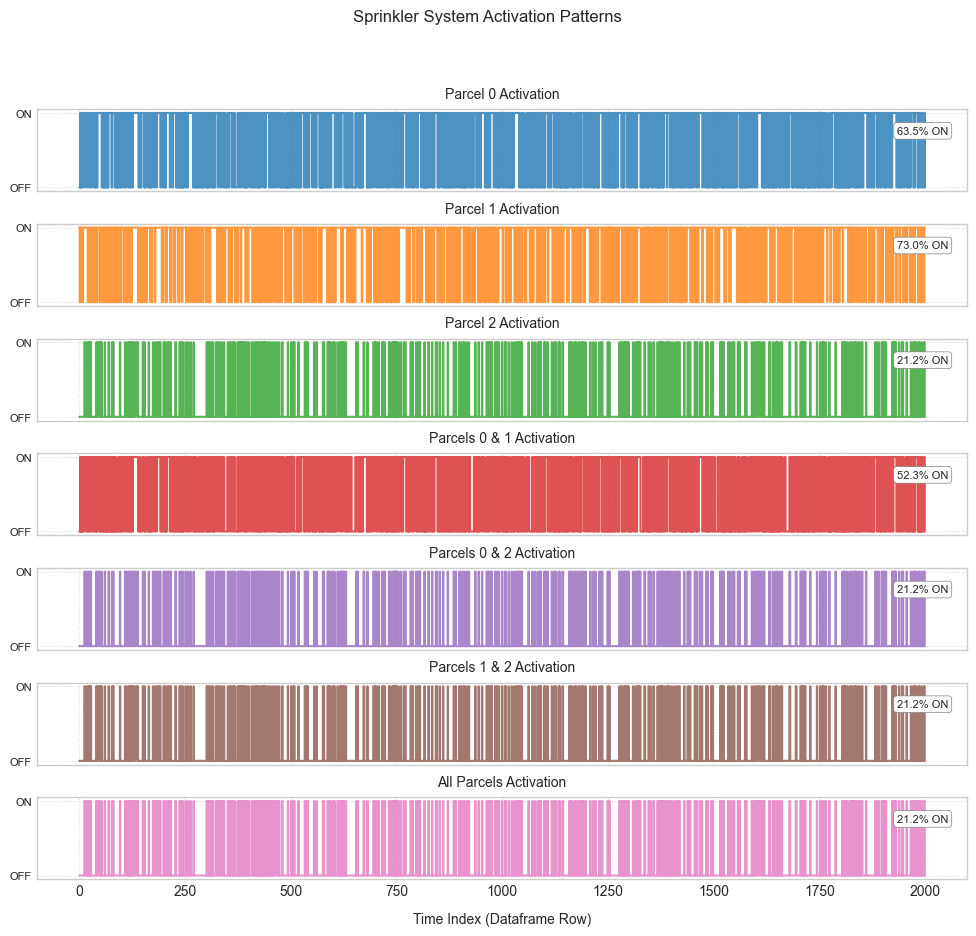

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Define activation conditions properly
conditions = {
    "Parcel 0": df['parcel_0'],
    "Parcel 1": df['parcel_1'],
    "Parcel 2": df['parcel_2'],
    "Parcels 0 & 1": df['parcel_0'] & df['parcel_1'],
    "Parcels 0 & 2": df['parcel_0'] & df['parcel_2'],
    "Parcels 1 & 2": df['parcel_1'] & df['parcel_2'],
    "All Parcels": df['parcel_0'] & df['parcel_1'] & df['parcel_2']
}

# Color palette for each condition
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', 
          '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create figure with optimized layout
fig, axs = plt.subplots(len(conditions), 1, figsize=(12, 10), 
                       sharex=True, gridspec_kw={'hspace': 0.4})

# Plot each activation pattern
for ax, (title, condition), color in zip(axs, conditions.items(), colors):
    # Plot the step function
    ax.step(df.index, condition.astype(int), 
            where='post', 
            linewidth=1.5, 
            color=color,
            alpha=0.8)
    
    # Formatting
    ax.set_title(f"{title} Activation", pad=8, fontsize=10)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'], fontsize=8)
    ax.grid(True, linestyle=':', alpha=0.6)
    
    # Add activation percentage annotation
    activation_pct = condition.mean() * 100
    ax.annotate(f'{activation_pct:.1f}% ON', 
                xy=(0.98, 0.7), 
                xycoords='axes fraction',
                ha='right',
                fontsize=8,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.5))

# Final formatting
axs[-1].set_xlabel("Time Index (Dataframe Row)", labelpad=10)
plt.suptitle("Sprinkler System Activation Patterns", y=0.98, fontsize=12)
plt.tight_layout()
plt.show()

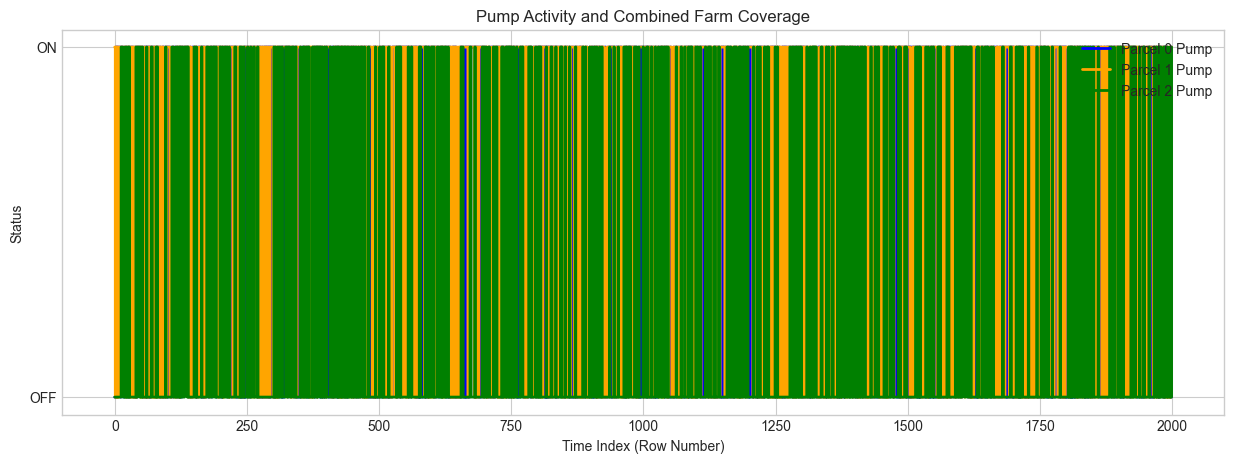

In [30]:
# Calculate combined activity of all pumps (overlap)
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))

# Plot individual pump statuses
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green')

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()


In [38]:
import joblib
import os

try:
    # Save model with optimal compression
    joblib.dump(model, "Farm_Irrigation_System.pkl", compress=3)
    
    # Verify and print file info
    if os.path.exists("Farm_Irrigation_System.pkl"):
        file_size = os.path.getsize("Farm_Irrigation_System.pkl") / 1024  # Convert to KB
        print(f"✅ Model saved successfully (size: {file_size:.1f} KB)")
    else:
        print("⚠️ Model file not found after saving")
        
except Exception as e:
    print(f"❌ Error saving model: {str(e)}")

✅ Model saved successfully (size: 2757.5 KB)
